In [1]:
from PIL import Image, ImageDraw, ImageFont
import os
 
# name of the file to save
filename = "img01.png"
#fnt = ImageFont.truetype('arial.ttf', 15)
fontsize=50
fnt = ImageFont.truetype('/usr/share/fonts/truetype/freefont/FreeSerifBold.ttf',fontsize)
# create new image
image = Image.new(mode = "RGB", size = (230,70), color = "white")
draw = ImageDraw.Draw(image)
draw.text((10,10), "SpatialPy", font=fnt, fill=(0,0,0))


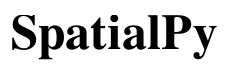

In [2]:
image

In [3]:
import numpy
import matplotlib.pyplot as plt

(2.8999999999999986, 225.1, 169.85, 217.15)

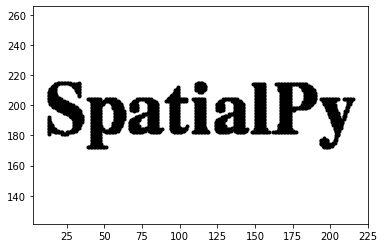

In [4]:
image_array = numpy.asarray(image)
word_points_x = []
word_points_y = []
#print("image_array.shape",image_array.shape)
for y in range(image_array.shape[0]):
    for x in range(image_array.shape[1]):
        if image_array[y,x,0] < 50:
            word_points_x.append(x)
            word_points_y.append(image_array.shape[1]-y)
#print('word_points_x',len(word_points_x))
#print('word_points_y',len(word_points_y))
plt.plot(word_points_x, word_points_y,'.k')
plt.axis('equal')

In [5]:
import sys
sys.path.insert(0,'..')
import spatialpy
spatialpy.__file__

'../spatialpy/__init__.py'

In [11]:
class SpatialPyGravity(spatialpy.Model):
    def __init__(self,x_vals,y_vals, xmax, ymax):
        spatialpy.Model.__init__(self,"SpatialPyGravity")
        self.mesh = spatialpy.Mesh(len(x_vals), 
                        (0,xmax), (0,ymax), (0,0),
                        gravity=[0,-1,0])
        for ndx  in range(len(x_vals)):
            self.mesh.vertices[ndx,0] = x
            self.mesh.vertices[ndx,1] = y
            self.mesh.sd[ndx] = 1
            self.mesh.mass[ndx] = 1.0
            self.mesh.vol[ndx] = 1.0
            self.mesh.nu[ndx] = 1.0

        # Define time parameters
        self.timestep_size = 1e-4  # timestep size
        self.num_timesteps = 500    # number of timesteps
        self.output_freq = 100      # frequency of outputting results

In [12]:
model = SpatialPyGravity(word_points_x,word_points_y,
                 image_array.shape[1],image_array.shape[0])

In [13]:
sol = spatialpy.Solver(model, debug_level=1)
%time sol.compile()

Compiling Solver.  Build dir: /tmp/spatialpy_build_ohu0veg7


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [14]:
model.mesh.vertices.shape

(2455, 3)